In [ ]:
import requests
import zipfile
import io
import os
import pandas as pd

zip_file_url = "https://archive.ics.uci.edu/static/public/501/beijing+multi+site+air+quality+data.zip"
r = requests.get(zip_file_url)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract("PRSA2017_Data_20130301-20170228.zip","/content/")

f = zipfile.ZipFile("/content/PRSA2017_Data_20130301-20170228.zip")
f.extractall("/content/")

try:
    os.remove("/content/PRSA2017_Data_20130301-20170228.zip")
except:
    print("No zip file to remove")

os.chdir("/content/PRSA_Data_20130301-20170228")

print("Previous File Names:")
for data_file in os.listdir(os.getcwd()):
    print('\t' + data_file)
    file_name = list(data_file.split('_'))
    os.rename(data_file, str(file_name[2])+'.csv')




Previous File Names:
	PRSA_Data_Changping_20130301-20170228.csv
	PRSA_Data_Shunyi_20130301-20170228.csv
	PRSA_Data_Wanshouxigong_20130301-20170228.csv
	PRSA_Data_Nongzhanguan_20130301-20170228.csv
	PRSA_Data_Guanyuan_20130301-20170228.csv
	PRSA_Data_Tiantan_20130301-20170228.csv
	PRSA_Data_Aotizhongxin_20130301-20170228.csv
	PRSA_Data_Dongsi_20130301-20170228.csv
	PRSA_Data_Huairou_20130301-20170228.csv
	PRSA_Data_Dingling_20130301-20170228.csv
	PRSA_Data_Gucheng_20130301-20170228.csv
	PRSA_Data_Wanliu_20130301-20170228.csv


In [ ]:
print("New File Names:")
file_url_list = []
for file_name in os.listdir(os.getcwd()):
    print("\t" + file_name)
    file_url_list.append(os.getcwd()+'/'+file_name)

df_0 = pd.read_csv(file_url_list[0])
df_0.drop(columns=['No'], inplace=True)
df_0

df_0['timestamp'] = pd.to_datetime(df_0[["year", "month", "day", "hour"]])
df_0 = df_0.sort_values(by="timestamp").reset_index(drop=True)

df_0.drop(columns=['year', 'month', 'day', 'hour', 'station'], inplace=True)

df_0[df_0[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].isna().any(axis=1)]

# Function to replace NaN values with the average of the non-NaN values above and below
def replace_nan_with_average(series):
    for i in range(1, len(series) - 1):
        if pd.isna(series[i]):
            start_index = i - 1
            end_index = i + 1
            while end_index < len(series) and pd.isna(series[end_index]):
                end_index += 1
            if end_index == len(series):
                end_index -= 1
        series.interpolate(method='linear', inplace=True)
    return series

# Apply the function to the 'value' column
df_0['CO'] = replace_nan_with_average(df_0['CO'])

df_0.dropna(inplace=True)
df_0.reset_index(drop=True, inplace=True)
df_0

New File Names:
	Dongsi.csv
	Dingling.csv
	Tiantan.csv
	Wanshouxigong.csv
	Wanliu.csv
	Huairou.csv
	Nongzhanguan.csv
	Shunyi.csv
	Changping.csv
	Gucheng.csv
	Aotizhongxin.csv
	Guanyuan.csv


PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
0        9.0   9.0   3.0  17.0   300.0  89.0  -0.5  1024.5 -21.4   0.0  NNW   
1        4.0   4.0   3.0  16.0   300.0  88.0  -0.7  1025.1 -22.1   0.0   NW   
2        4.0   4.0   9.0  25.0   300.0  78.0  -2.4  1027.5 -21.3   0.0   NW   
3        5.0   5.0  10.0  29.0   400.0  67.0  -2.5  1028.2 -20.4   0.0   NW   
4        3.0   6.0  12.0  40.0   400.0  52.0  -1.4  1029.5 -20.4   0.0  NNW   
...      ...   ...   ...   ...     ...   ...   ...     ...   ...   ...  ...   
32804   16.0  51.0   3.0  29.0   400.0  73.0  12.5  1013.5 -16.2   0.0   NW   
32805   18.0  45.0   3.0  43.0   500.0  54.0  11.6  1013.6 -15.1   0.0  WNW   
32806   23.0  58.0   5.0  61.0   700.0  28.0  10.8  1014.2 -13.3   0.0   NW   
32807   23.0  53.0   9.0  75.0   900.0  15.0  10.5  1014.4 -12.9   0.0  NNW   
32808   30.0  71.0  11.0  87.0  1200.0   4.0   8.6  1014.1 -15.9   0.0  NNE   

       WSPM           timestamp  
0       5.7 2013-03-01 00:00:00  
1       3.9 2013-03-01 01:00:00  
2       2.4 2013-03-01 05:00:00  
3       2.2 2013-03-01 06:00:00  
4       3.0 2013-03-01 07:00:00  
...     ...                 ...  
32804   2.4 2017-02-28 19:00:00  
32805   0.9 2017-02-28 20:00:00  
32806   1.1 2017-02-28 21:00:00  
32807   1.2 2017-02-28 22:00:00  
32808   1.3 2017-02-28 23:00:00  

[32809 rows x 13 columns]

In [ ]:
# Check for NaN values in the DataFrame
nan_values = df_0.isna().sum()
print("NaN values in DataFrame:")
print(nan_values)


NaN values in DataFrame:
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
timestamp    0
dtype: int64


In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
from prophet import Prophet
df = df_0
# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
data = df[['timestamp', 'PM2.5']].rename(columns={'timestamp': 'ds', 'PM2.5': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Define future timeframe
future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

# Make predictions
forecast = model.predict(future)

# Print forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

DEBUG:cmdstanpy:input tempfile: /tmp/tmpec16uhj2/0t2x7acx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpec16uhj2/juiephtp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55069', 'data', 'file=/tmp/tmpec16uhj2/0t2x7acx.json', 'init=/tmp/tmpec16uhj2/juiephtp.json', 'output', 'file=/tmp/tmpec16uhj2/prophet_model3f1d3tqa/prophet_model-20240508224926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:49:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                       ds        yhat  yhat_lower  yhat_upper
33169 2018-02-24 23:00:00  139.922855  -18.376505  291.815388
33170 2018-02-25 23:00:00  129.564870  -34.078651  277.326281
33171 2018-02-26 23:00:00  129.515971  -31.528283  276.199404
33172 2018-02-27 23:00:00  136.443322  -24.366248  284.512752
33173 2018-02-28 23:00:00  134.820531  -40.190013  277.874047


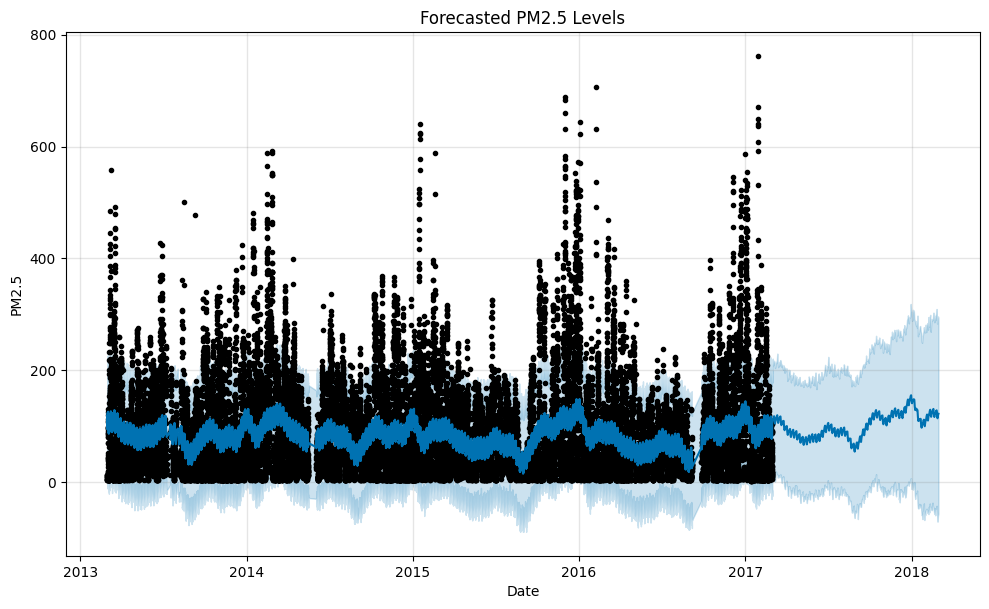

In [ ]:
import matplotlib.pyplot as plt

# Plot forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Forecasted PM2.5 Levels')
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/8_m5tuy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/te6xi5eb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46374', 'data', 'file=/tmp/tmpdv4bdnbz/8_m5tuy9.json', 'init=/tmp/tmpdv4bdnbz/te6xi5eb.json', 'output', 'file=/tmp/tmpdv4bdnbz/prophet_model53bvss9m/prophet_model-20240429033418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/gwxh6hrm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/f8kwjz30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

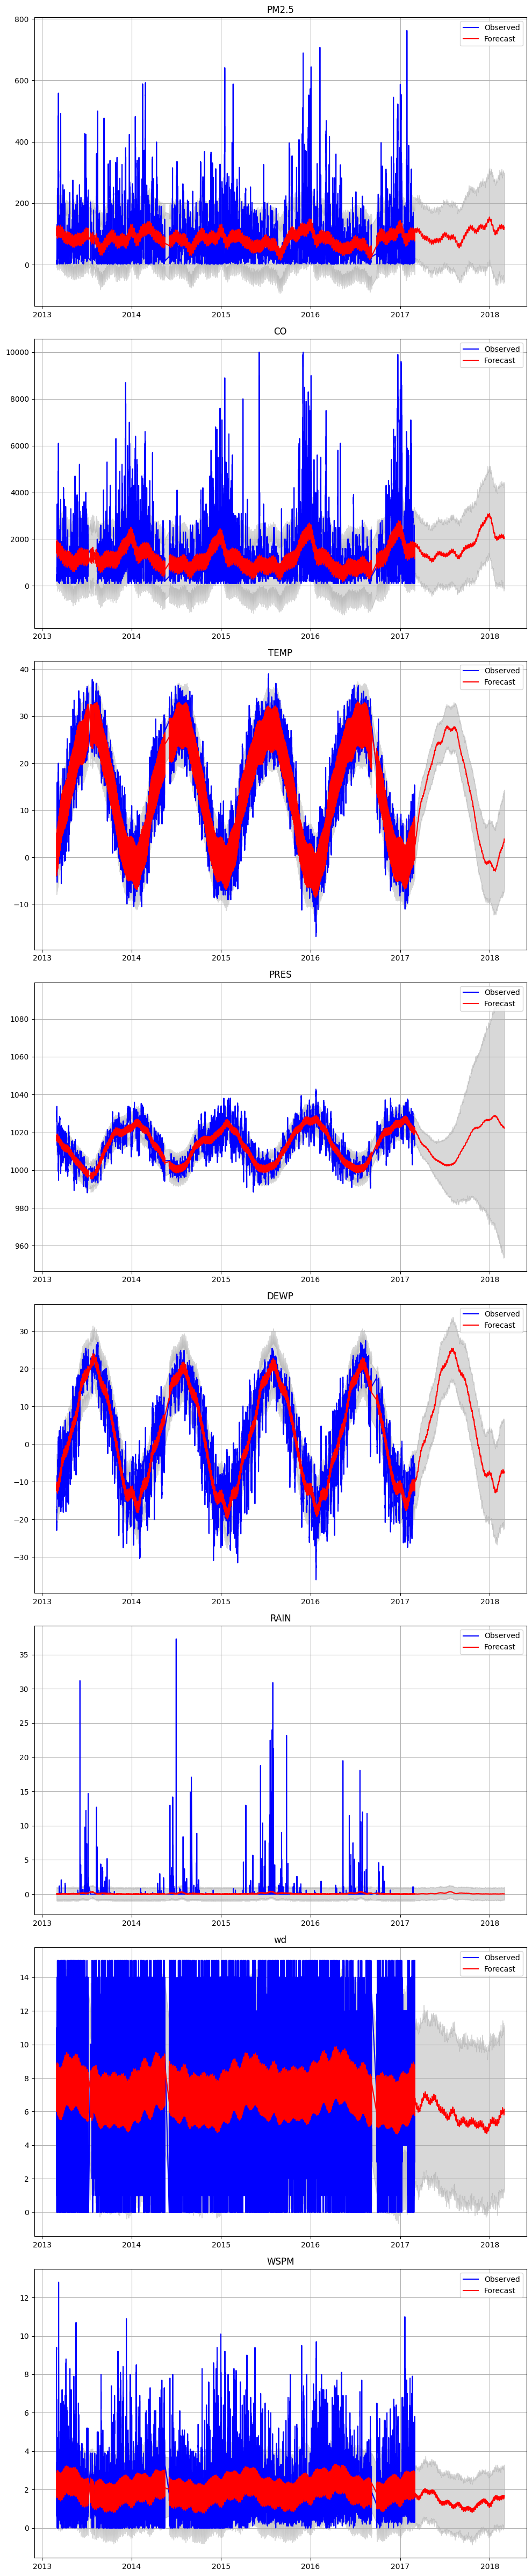

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Initialize Prophet models for each variable
models = {var: Prophet() for var in variables}

# Fit the models for each variable
for var in variables:
    data = df[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    models[var].fit(data)

# Define future timeframe
future = {var: models[var].make_future_dataframe(periods=365) for var in variables}  # Adjust the number of periods as needed

# Make predictions for each variable
forecasts = {var: models[var].predict(future[var]) for var in variables}

# Plot forecasts for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 6*len(variables)))

for i, var in enumerate(variables):
    ax = axes[i] if len(variables) > 1 else axes
    ax.plot(df['timestamp'], df[var], label='Observed', color='blue')
    ax.plot(forecasts[var]['ds'], forecasts[var]['yhat'], label='Forecast', color='red')
    ax.fill_between(forecasts[var]['ds'], forecasts[var]['yhat_lower'], forecasts[var]['yhat_upper'], color='gray', alpha=0.3)
    ax.set_title(var)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


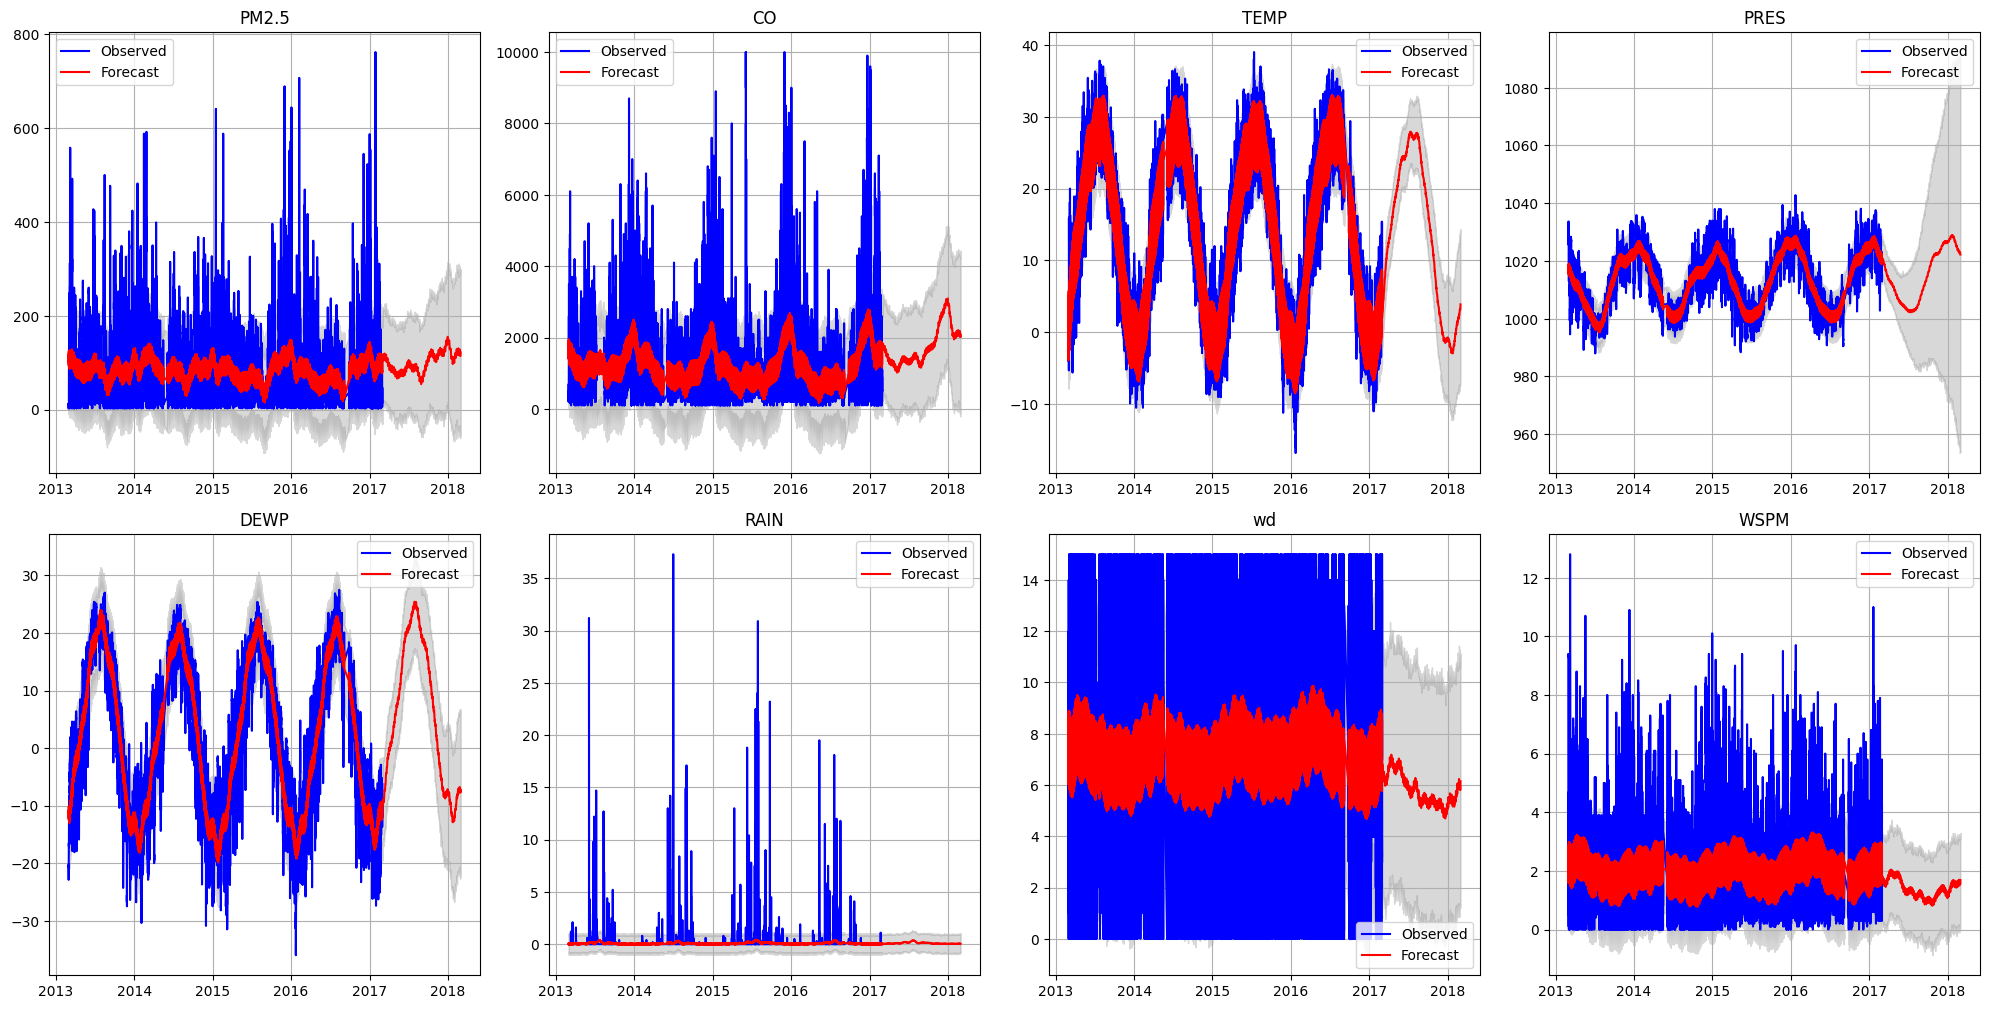

In [ ]:
# Plot forecasts for each variable in a 4 by 4 grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.plot(df['timestamp'], df[var], label='Observed', color='blue')
    ax.plot(forecasts[var]['ds'], forecasts[var]['yhat'], label='Forecast', color='red')
    ax.fill_between(forecasts[var]['ds'], forecasts[var]['yhat_lower'], forecasts[var]['yhat_upper'], color='gray', alpha=0.3)
    ax.set_title(var)
    ax.legend()
    ax.grid(True)

# Remove empty subplots
for i in range(len(variables), 4 * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/yb7fenev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/0morgwjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50152', 'data', 'file=/tmp/tmpdv4bdnbz/yb7fenev.json', 'init=/tmp/tmpdv4bdnbz/0morgwjp.json', 'output', 'file=/tmp/tmpdv4bdnbz/prophet_modelmh_1ir1r/prophet_model-20240429040341.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:03:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:03:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


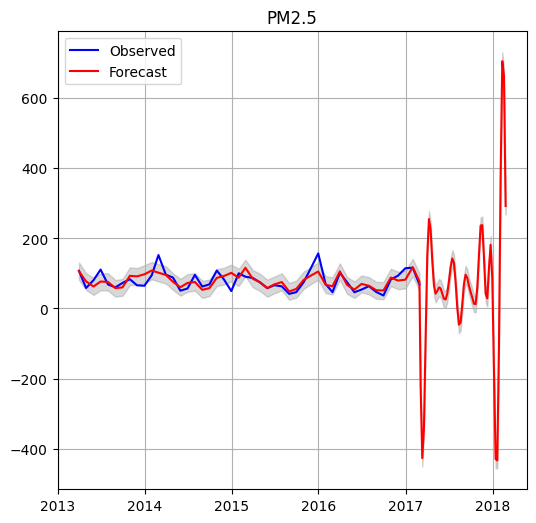

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Aggregate data at weekly level
df_weekly = df.resample('M', on='timestamp').mean()

# Initialize Prophet models for each variable
models = {var: Prophet() for var in variables}

# Fit the models for each variable
for var in variables:
    data = df_weekly.reset_index()[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    models[var].fit(data)

# Define future timeframe
future = {var: models[var].make_future_dataframe(periods=52, freq='W') for var in variables}  # Predicting for 52 weeks

# Make predictions for each variable
forecasts = {var: models[var].predict(future[var]) for var in variables}

# Plot forecasts for each variable in a 4 by 4 grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.plot(df_weekly.index, df_weekly[var], label='Observed', color='blue')
    ax.plot(forecasts[var]['ds'], forecasts[var]['yhat'], label='Forecast', color='red')
    ax.fill_between(forecasts[var]['ds'], forecasts[var]['yhat_lower'], forecasts[var]['yhat_upper'], color='gray', alpha=0.3)
    ax.set_title(var)
    ax.legend()
    ax.grid(True)

# Remove empty subplots
for i in range(len(variables), 4 * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
#weekly level

In [ ]:
df = df_0

In [ ]:
df

PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
0        9.0   9.0   3.0  17.0   300.0  89.0  -0.5  1024.5 -21.4   0.0  NNW   
1        4.0   4.0   3.0  16.0   300.0  88.0  -0.7  1025.1 -22.1   0.0   NW   
2        4.0   4.0   9.0  25.0   300.0  78.0  -2.4  1027.5 -21.3   0.0   NW   
3        5.0   5.0  10.0  29.0   400.0  67.0  -2.5  1028.2 -20.4   0.0   NW   
4        3.0   6.0  12.0  40.0   400.0  52.0  -1.4  1029.5 -20.4   0.0  NNW   
...      ...   ...   ...   ...     ...   ...   ...     ...   ...   ...  ...   
32804   16.0  51.0   3.0  29.0   400.0  73.0  12.5  1013.5 -16.2   0.0   NW   
32805   18.0  45.0   3.0  43.0   500.0  54.0  11.6  1013.6 -15.1   0.0  WNW   
32806   23.0  58.0   5.0  61.0   700.0  28.0  10.8  1014.2 -13.3   0.0   NW   
32807   23.0  53.0   9.0  75.0   900.0  15.0  10.5  1014.4 -12.9   0.0  NNW   
32808   30.0  71.0  11.0  87.0  1200.0   4.0   8.6  1014.1 -15.9   0.0  NNE   

       WSPM           timestamp  
0       5.7 2013-03-01 00:00:00  
1       3.9 2013-03-01 01:00:00  
2       2.4 2013-03-01 05:00:00  
3       2.2 2013-03-01 06:00:00  
4       3.0 2013-03-01 07:00:00  
...     ...                 ...  
32804   2.4 2017-02-28 19:00:00  
32805   0.9 2017-02-28 20:00:00  
32806   1.1 2017-02-28 21:00:00  
32807   1.2 2017-02-28 22:00:00  
32808   1.3 2017-02-28 23:00:00  

[32809 rows x 13 columns]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/7cvfpe8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/kj4udgmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32763', 'data', 'file=/tmp/tmpopqdatjq/7cvfpe8l.json', 'init=/tmp/tmpopqdatjq/kj4udgmt.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_model6blm6a6m/prophet_model-20240504195941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

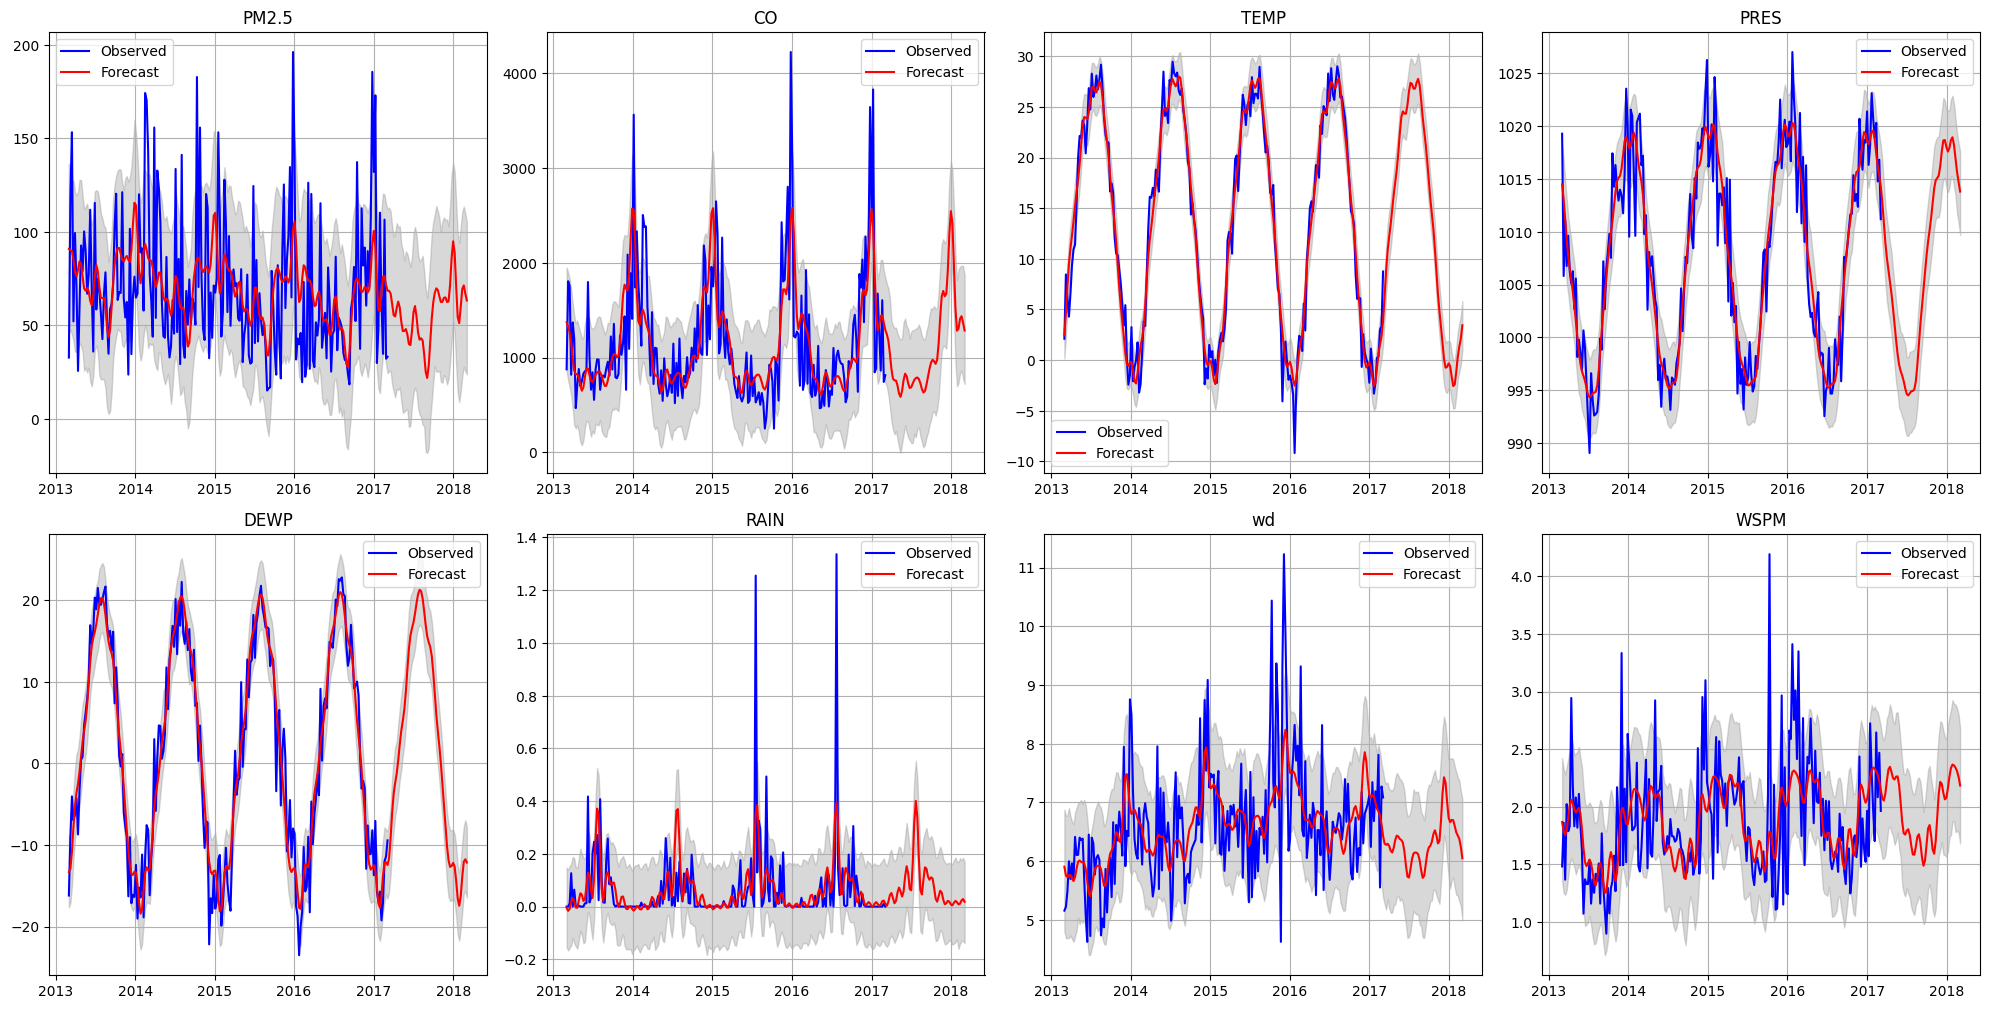

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Aggregate data at weekly level
df_weekly = df.resample('W', on='timestamp').mean()

# Initialize Prophet models for each variable
models = {var: Prophet() for var in variables}

# Fit the models for each variable
for var in variables:
    data = df_weekly.reset_index()[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    models[var].fit(data)

# Define future timeframe
future = {var: models[var].make_future_dataframe(periods=52, freq='W') for var in variables}  # Predicting for 52 weeks

# Make predictions for each variable
forecasts = {var: models[var].predict(future[var]) for var in variables}

# Plot forecasts for each variable in a 4 by 4 grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.plot(df_weekly.index, df_weekly[var], label='Observed', color='blue')
    ax.plot(forecasts[var]['ds'], forecasts[var]['yhat'], label='Forecast', color='red')
    ax.fill_between(forecasts[var]['ds'], forecasts[var]['yhat_lower'], forecasts[var]['yhat_upper'], color='gray', alpha=0.3)
    ax.set_title(var)
    ax.legend()
    ax.grid(True)

# Remove empty subplots
for i in range(len(variables), 4 * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
#independent variable

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd085btmn/v9k66711.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd085btmn/7_1k204l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39460', 'data', 'file=/tmp/tmpd085btmn/v9k66711.json', 'init=/tmp/tmpd085btmn/7_1k204l.json', 'output', 'file=/tmp/tmpd085btmn/prophet_modelicz_2o4z/prophet_model-20240508223842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

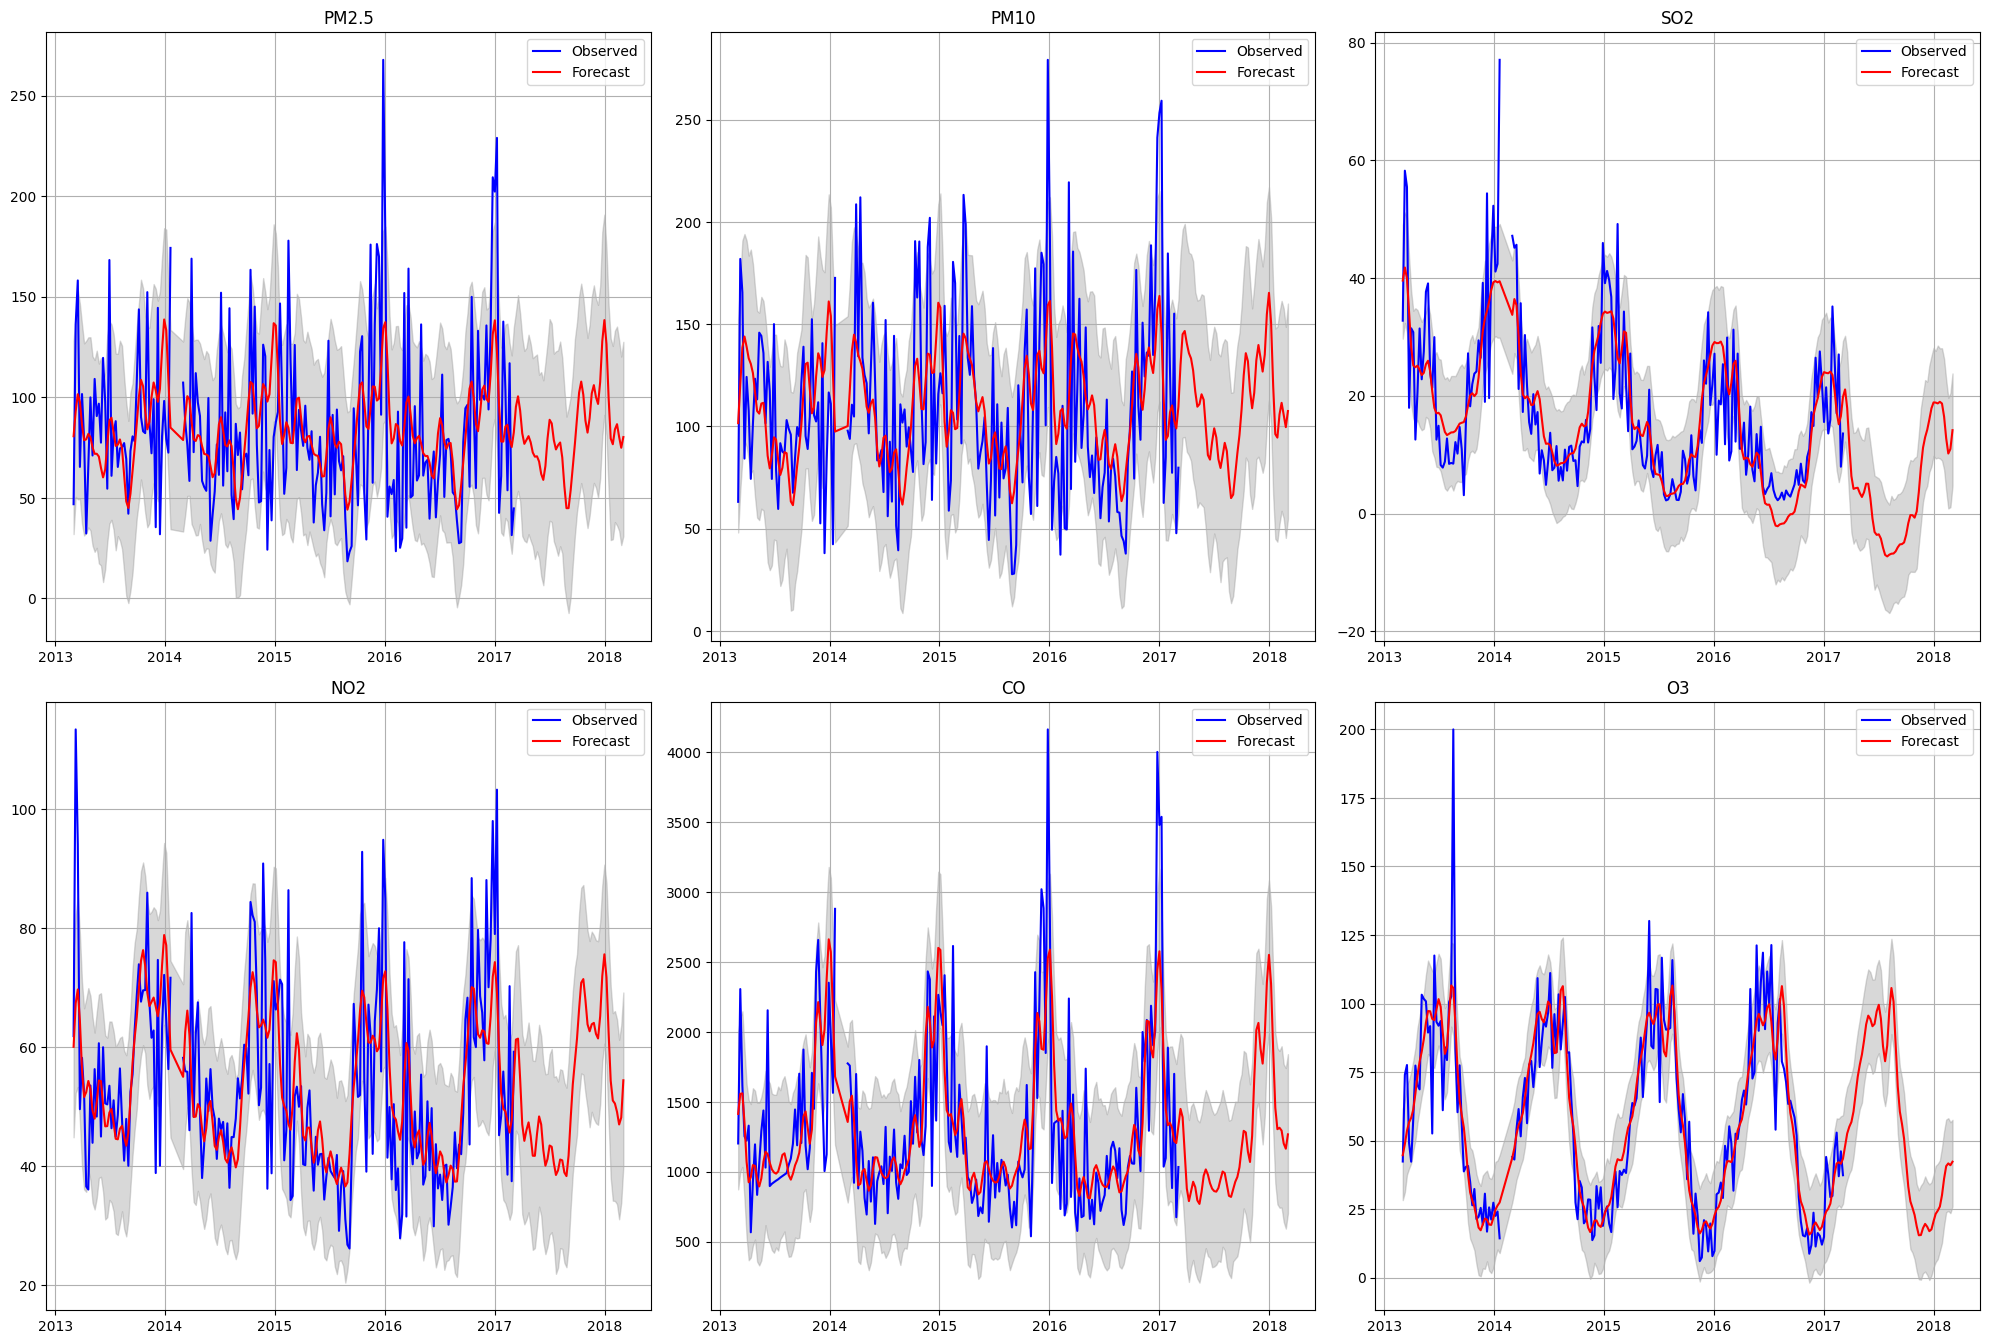

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Aggregate data at weekly level
df_weekly = df.resample('W', on='timestamp').mean()

# Initialize Prophet models for each variable
models = {var: Prophet() for var in variables}

# Fit the models for each variable
for var in variables:
    data = df_weekly.reset_index()[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    models[var].fit(data)

# Define future timeframe
future = {var: models[var].make_future_dataframe(periods=52, freq='W') for var in variables}  # Predicting for 52 weeks

# Make predictions for each variable
forecasts = {var: models[var].predict(future[var]) for var in variables}

# Plot forecasts for each variable in a 4 by 4 grid
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.plot(df_weekly.index, df_weekly[var], label='Observed', color='blue')
    ax.plot(forecasts[var]['ds'], forecasts[var]['yhat'], label='Forecast', color='red')
    ax.fill_between(forecasts[var]['ds'], forecasts[var]['yhat_lower'], forecasts[var]['yhat_upper'], color='gray', alpha=0.3)
    ax.set_title(var)
    ax.legend()
    ax.grid(True)

# Remove empty subplots
for i in range(len(variables), 3 * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
#Monthly level

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/77_6ct26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdv4bdnbz/76dekhfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10094', 'data', 'file=/tmp/tmpdv4bdnbz/77_6ct26.json', 'init=/tmp/tmpdv4bdnbz/76dekhfw.json', 'output', 'file=/tmp/tmpdv4bdnbz/prophet_model2vghfspp/prophet_model-20240429040143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:01:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:01:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

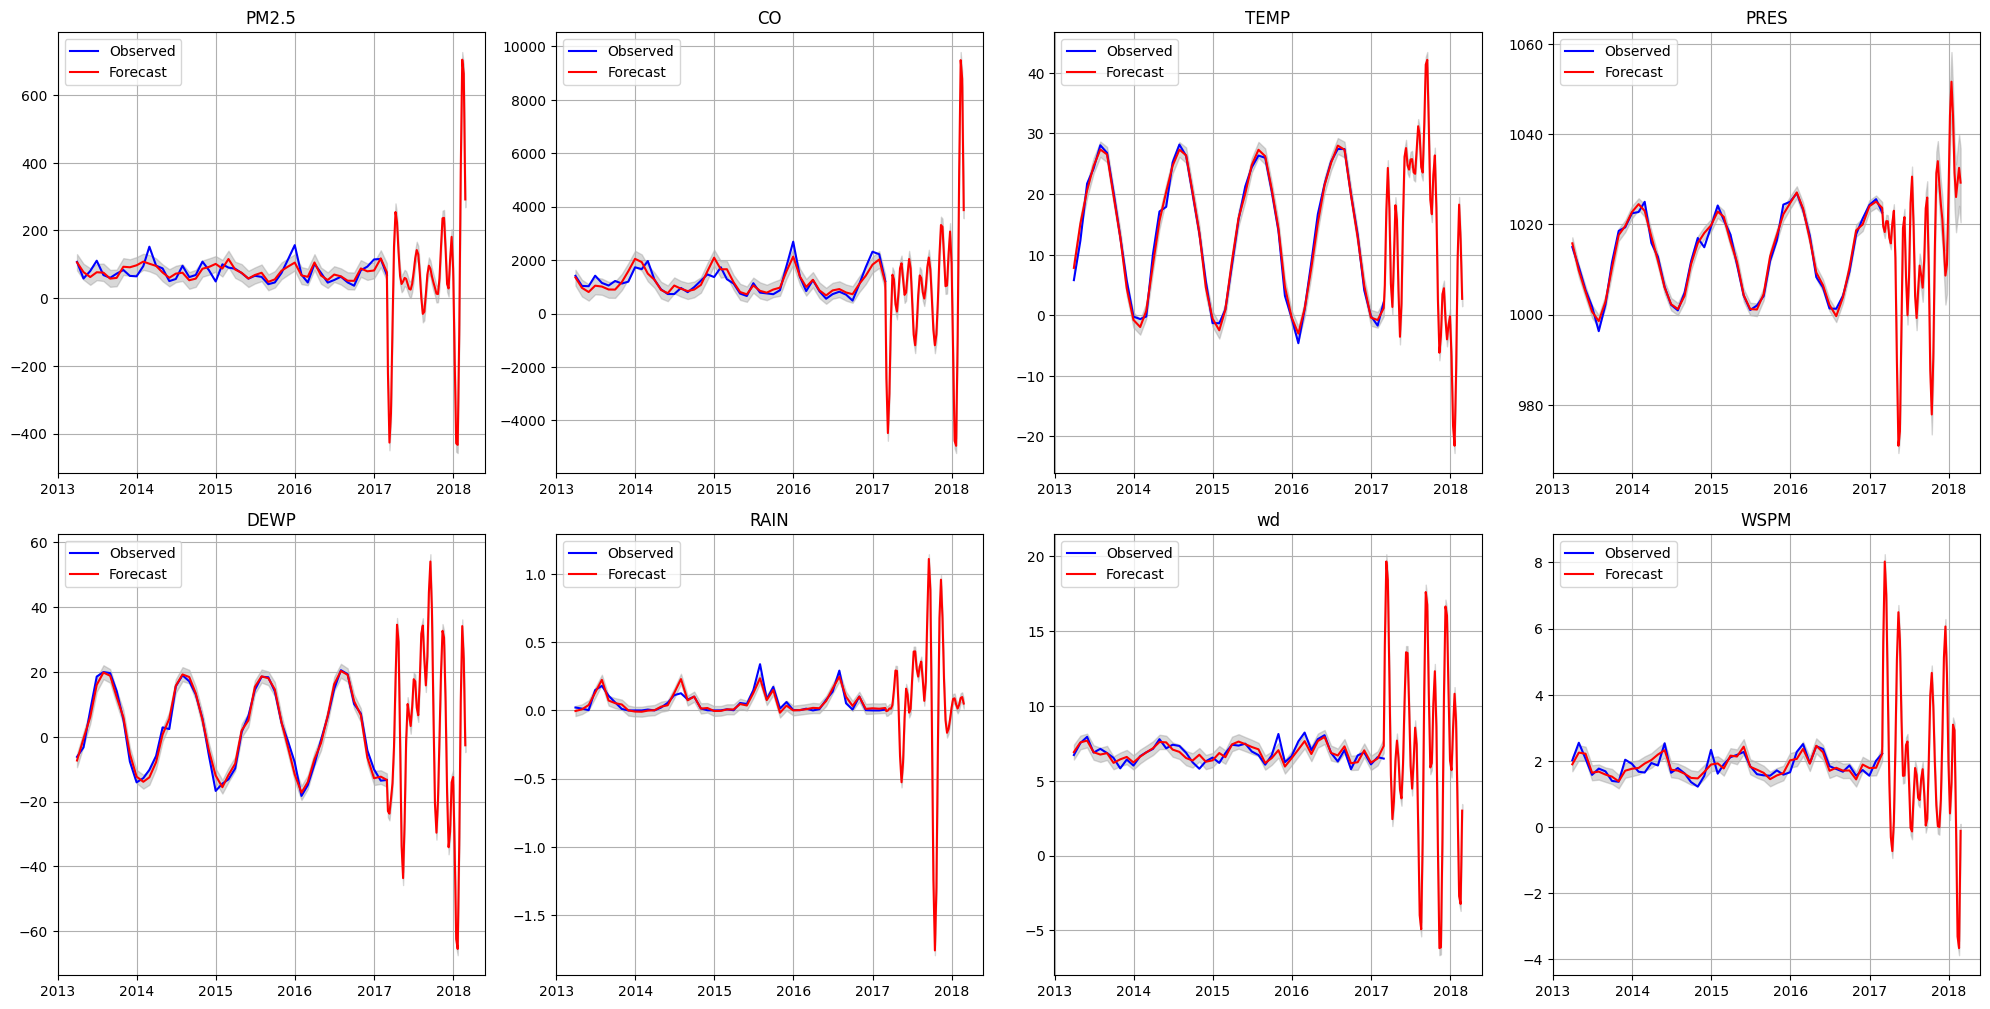

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Aggregate data at weekly level
df_weekly = df.resample('M', on='timestamp').mean()

# Initialize Prophet models for each variable
models = {var: Prophet() for var in variables}

# Fit the models for each variable
for var in variables:
    data = df_weekly.reset_index()[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    models[var].fit(data)

# Define future timeframe
future = {var: models[var].make_future_dataframe(periods=52, freq='W') for var in variables}  # Predicting for 52 weeks

# Make predictions for each variable
forecasts = {var: models[var].predict(future[var]) for var in variables}

# Plot forecasts for each variable in a 4 by 4 grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.plot(df_weekly.index, df_weekly[var], label='Observed', color='blue')
    ax.plot(forecasts[var]['ds'], forecasts[var]['yhat'], label='Forecast', color='red')
    ax.fill_between(forecasts[var]['ds'], forecasts[var]['yhat_lower'], forecasts[var]['yhat_upper'], color='gray', alpha=0.3)
    ax.set_title(var)
    ax.legend()
    ax.grid(True)

# Remove empty subplots
for i in range(len(variables), 4 * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
# aggregate on weekly level
# label encode wd column
# calculate training and testing error
# plot the results
# plot the error

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/qhpy272s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/g7qy9ocp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87765', 'data', 'file=/tmp/tmpopqdatjq/qhpy272s.json', 'init=/tmp/tmpopqdatjq/g7qy9ocp.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modelnu_1w9fw/prophet_model-20240504200518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


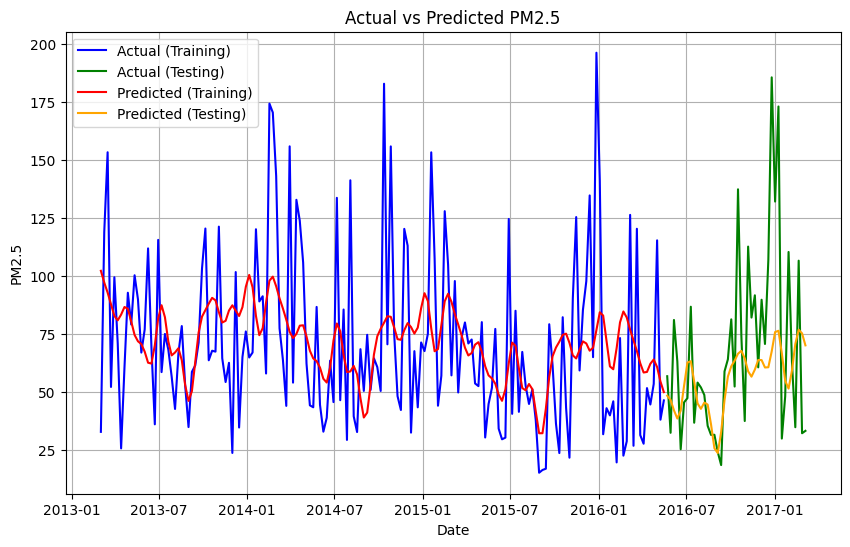

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/zxvmd9m2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/ur6jpz1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81616', 'data', 'file=/tmp/tmpopqdatjq/zxvmd9m2.json', 'init=/tmp/tmpopqdatjq/ur6jpz1p.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modelk7t_lr17/prophet_model-20240504200520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


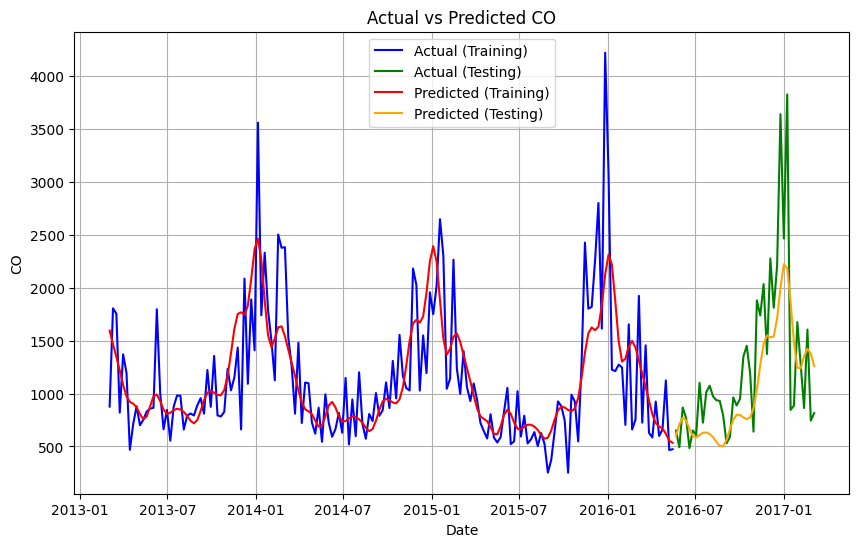

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/17q0a4nb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/3il7rej3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97844', 'data', 'file=/tmp/tmpopqdatjq/17q0a4nb.json', 'init=/tmp/tmpopqdatjq/3il7rej3.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modellxi2l6yz/prophet_model-20240504200522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


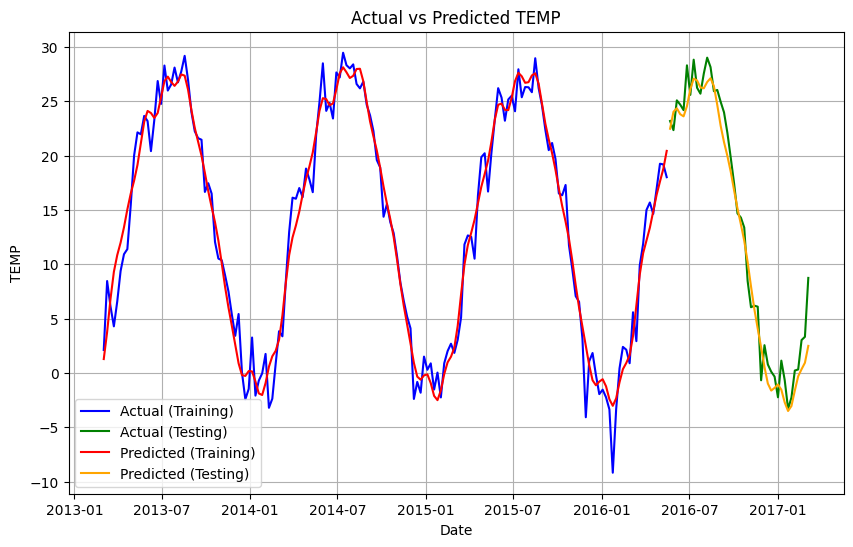

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/ojmgv1m3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/orzgmrsn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57020', 'data', 'file=/tmp/tmpopqdatjq/ojmgv1m3.json', 'init=/tmp/tmpopqdatjq/orzgmrsn.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modelbratxub4/prophet_model-20240504200523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


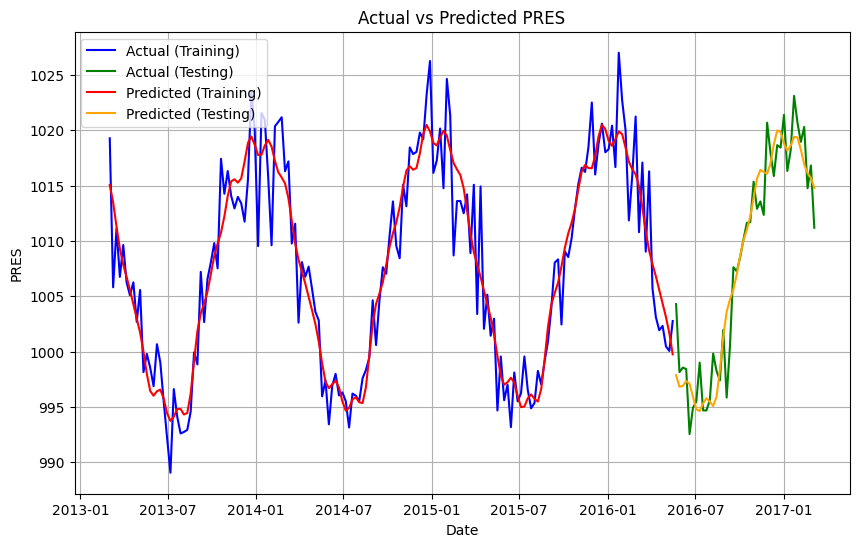

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/ow5jhy1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/k8w44v0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69105', 'data', 'file=/tmp/tmpopqdatjq/ow5jhy1t.json', 'init=/tmp/tmpopqdatjq/k8w44v0y.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modelaewzylgc/prophet_model-20240504200525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


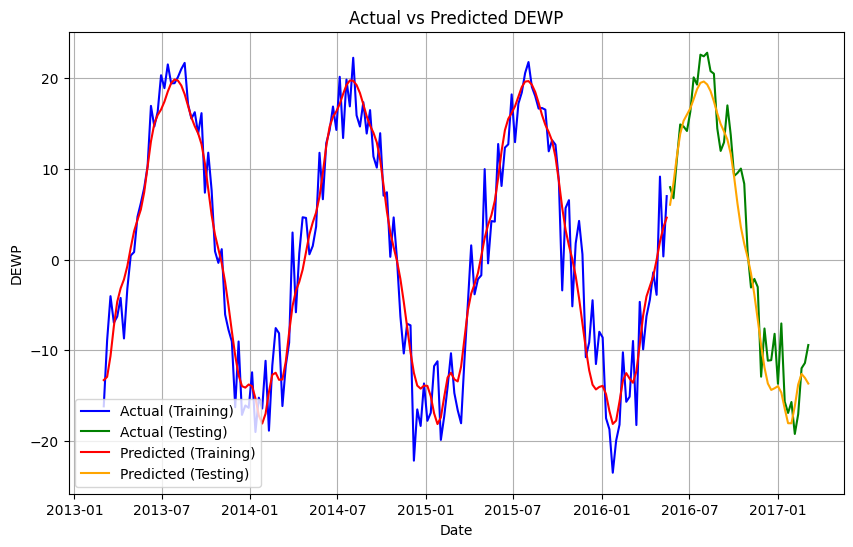

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/mgfdhvqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/kffiwy55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80126', 'data', 'file=/tmp/tmpopqdatjq/mgfdhvqm.json', 'init=/tmp/tmpopqdatjq/kffiwy55.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modelx7iny_mb/prophet_model-20240504200525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


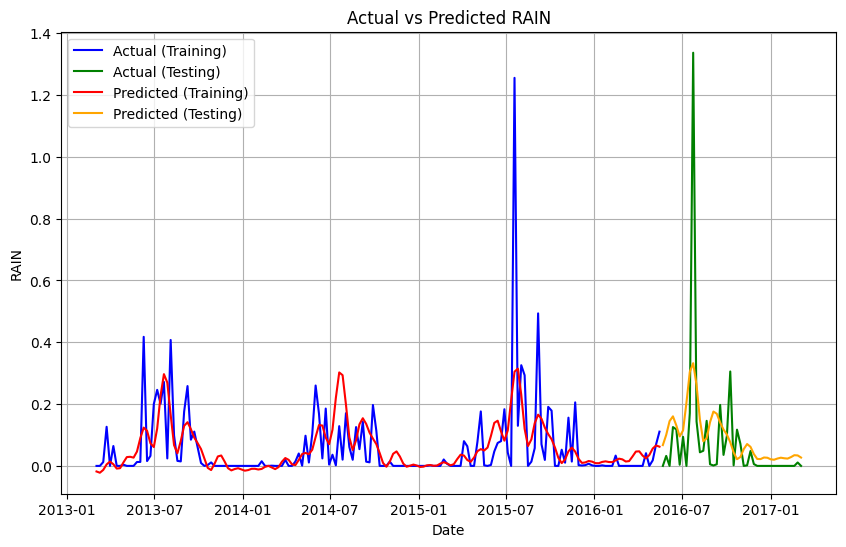

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/pm9luxku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/6tcy1bcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28253', 'data', 'file=/tmp/tmpopqdatjq/pm9luxku.json', 'init=/tmp/tmpopqdatjq/6tcy1bcp.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modelehvdo8ki/prophet_model-20240504200526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


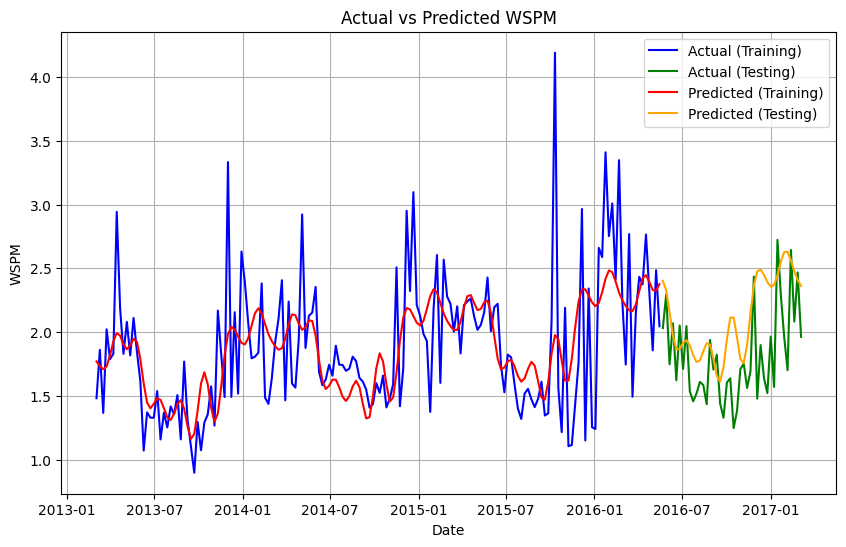

Training MAE:
PM2.5: 26.991752545161564
CO: 300.9772552468036
TEMP: 1.4281981662396666
PRES: 2.389491316592473
DEWP: 2.783421518447405
RAIN: 0.054179448316664595
WSPM: 0.30333589984454246

Training MSE:
PM2.5: 1168.7443825995406
CO: 177887.87729671778
TEMP: 3.4904047203353263
PRES: 9.368447643098838
DEWP: 12.021015187562515
RAIN: 0.011291134451836807
WSPM: 0.1836552324217397

Training RMSE:
PM2.5: 34.18690367084361
CO: 421.7675631158918
TEMP: 1.868262487001044
PRES: 3.060791996052466
DEWP: 3.4671335693282015
RAIN: 0.1062597499142399
WSPM: 0.4285501515829153

Testing MAE:
PM2.5: 26.117249785175915
CO: 404.0826441547
TEMP: 1.5683162132721615
PRES: 2.127151848854794
DEWP: 2.5154243848824365
RAIN: 0.08662168913134242
WSPM: 0.36047320288315776

Testing MSE:
PM2.5: 1311.2076321206
CO: 297288.7574830633
TEMP: 3.6873330219544607
PRES: 7.666583392391454
DEWP: 9.507991077076898
RAIN: 0.031083040593666702
WSPM: 0.20075773740075253

Testing RMSE:
PM2.5: 36.21060110134324
CO: 545.24192564683
TEMP: 

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Aggregate data at weekly level
df_weekly = df.resample('W', on='timestamp').mean().reset_index()  # Reset index to make 'timestamp' a column again

# Initialize dictionaries to store accuracy metrics
training_errors = {'MAE': {}, 'MSE': {}, 'RMSE': {}}
testing_errors = {'MAE': {}, 'MSE': {}, 'RMSE': {}}

# Split your data into training and testing sets
train_size = int(0.8 * len(df_weekly))  # 80% training data, 20% testing data
train_data = df_weekly[:train_size]
test_data = df_weekly[train_size:]

for var in variables:
    # Prepare data for the variable
    train_data_var = train_data[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    test_data_var = test_data[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the training data
    model.fit(train_data_var)

    # Make predictions on both training and testing data
    train_forecast = model.predict(train_data_var)
    test_forecast = model.predict(test_data_var)

    # Calculate MAE, MSE, and RMSE for training data
    train_mae = mean_absolute_error(train_data_var['y'], train_forecast['yhat'])
    train_mse = mean_squared_error(train_data_var['y'], train_forecast['yhat'])
    train_rmse = np.sqrt(train_mse)

    # Calculate MAE, MSE, and RMSE for testing data
    test_mae = mean_absolute_error(test_data_var['y'], test_forecast['yhat'])
    test_mse = mean_squared_error(test_data_var['y'], test_forecast['yhat'])
    test_rmse = np.sqrt(test_mse)

    # Store errors in dictionaries
    training_errors['MAE'][var] = train_mae
    training_errors['MSE'][var] = train_mse
    training_errors['RMSE'][var] = train_rmse

    testing_errors['MAE'][var] = test_mae
    testing_errors['MSE'][var] = test_mse
    testing_errors['RMSE'][var] = test_rmse

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_data_var['ds'], train_data_var['y'], label='Actual (Training)', color='blue')
    plt.plot(test_data_var['ds'], test_data_var['y'], label='Actual (Testing)', color='green')
    plt.plot(train_forecast['ds'], train_forecast['yhat'], label='Predicted (Training)', color='red')
    plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted (Testing)', color='orange')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.title(f'Actual vs Predicted {var}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print training and testing errors for all variables
print("Training MAE:")
for var, mae in training_errors['MAE'].items():
    print(f"{var}: {mae}")

print("\nTraining MSE:")
for var, mse in training_errors['MSE'].items():
    print(f"{var}: {mse}")

print("\nTraining RMSE:")
for var, rmse in training_errors['RMSE'].items():
    print(f"{var}: {rmse}")

print("\nTesting MAE:")
for var, mae in testing_errors['MAE'].items():
    print(f"{var}: {mae}")

print("\nTesting MSE:")
for var, mse in testing_errors['MSE'].items():
    print(f"{var}: {mse}")

print("\nTesting RMSE:")
for var, rmse in testing_errors['RMSE'].items():
    print(f"{var}: {rmse}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/cj0bptiz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpopqdatjq/uk7udxle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52171', 'data', 'file=/tmp/tmpopqdatjq/cj0bptiz.json', 'init=/tmp/tmpopqdatjq/uk7udxle.json', 'output', 'file=/tmp/tmpopqdatjq/prophet_modelzdltrlqq/prophet_model-20240504202233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

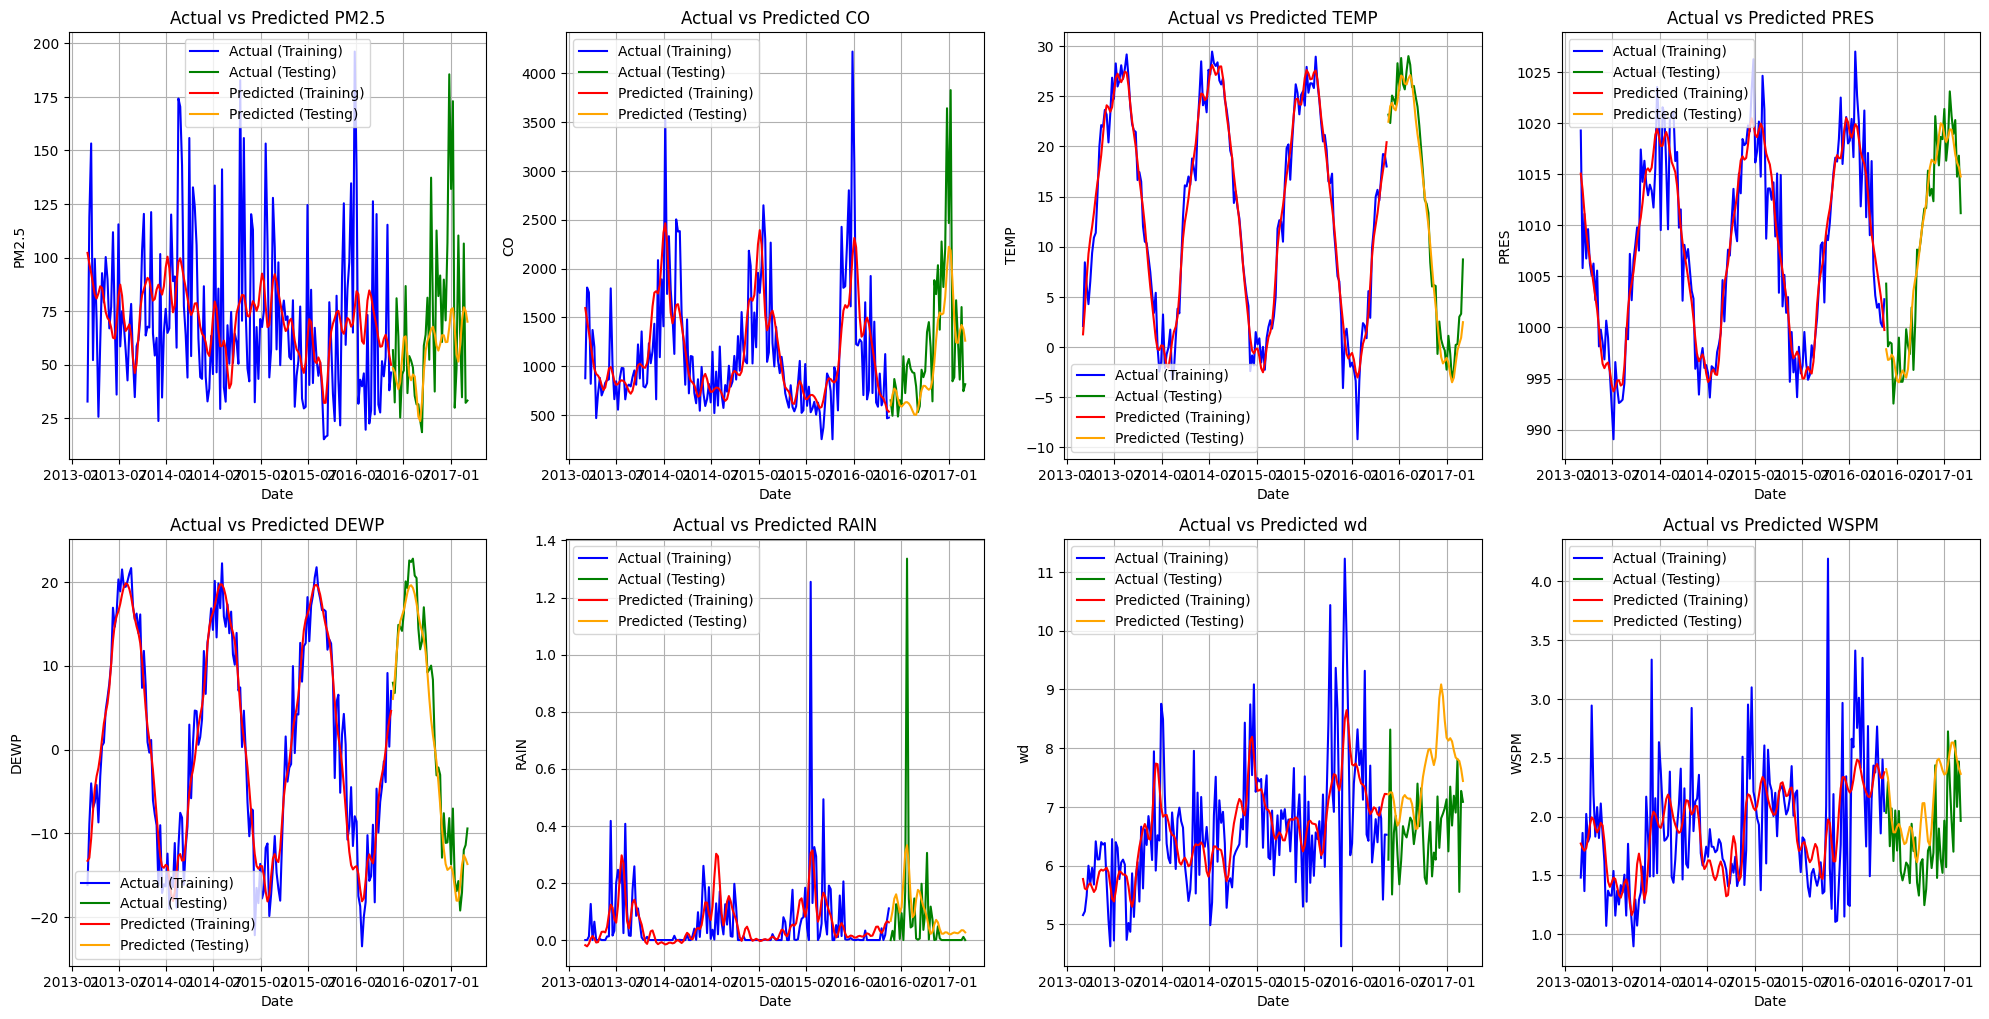

Training MAE:
PM2.5: 26.991752545161564
CO: 300.9772552468036
TEMP: 1.4281981662396666
PRES: 2.389491316592473
DEWP: 2.783421518447405
RAIN: 0.054179448316664595
wd: 0.6298871990231855
WSPM: 0.30333589984454246

Training MSE:
PM2.5: 1168.7443825995406
CO: 177887.87729671778
TEMP: 3.4904047203353263
PRES: 9.368447643098838
DEWP: 12.021015187562515
RAIN: 0.011291134451836807
wd: 0.6787486766846444
WSPM: 0.1836552324217397

Training RMSE:
PM2.5: 34.18690367084361
CO: 421.7675631158918
TEMP: 1.868262487001044
PRES: 3.060791996052466
DEWP: 3.4671335693282015
RAIN: 0.1062597499142399
wd: 0.8238620495475225
WSPM: 0.4285501515829153

Testing MAE:
PM2.5: 26.117249785175915
CO: 404.0826441547
TEMP: 1.5683162132721615
PRES: 2.127151848854794
DEWP: 2.5154243848824365
RAIN: 0.08662168913134242
wd: 1.0435085715119428
WSPM: 0.36047320288315776

Testing MSE:
PM2.5: 1311.2076321206
CO: 297288.7574830633
TEMP: 3.6873330219544607
PRES: 7.666583392391454
DEWP: 9.507991077076898
RAIN: 0.031083040593666702


In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd','WSPM']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Aggregate data at weekly level
df_weekly = df.resample('W', on='timestamp').mean().reset_index()  # Reset index to make 'timestamp' a column again

# Initialize dictionaries to store accuracy metrics
training_errors = {'MAE': {}, 'MSE': {}, 'RMSE': {}}
testing_errors = {'MAE': {}, 'MSE': {}, 'RMSE': {}}

# Split your data into training and testing sets
train_size = int(0.8 * len(df_weekly))  # 80% training data, 20% testing data
train_data = df_weekly[:train_size]
test_data = df_weekly[train_size:]

# Create subplots for each variable in a 4 by 4 grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, var in enumerate(variables):
    row = i // 4
    col = i % 4

    # Prepare data for the variable
    train_data_var = train_data[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    test_data_var = test_data[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the training data
    model.fit(train_data_var)

    # Make predictions on both training and testing data
    train_forecast = model.predict(train_data_var)
    test_forecast = model.predict(test_data_var)

    # Calculate MAE, MSE, and RMSE for training data
    train_mae = mean_absolute_error(train_data_var['y'], train_forecast['yhat'])
    train_mse = mean_squared_error(train_data_var['y'], train_forecast['yhat'])
    train_rmse = np.sqrt(train_mse)

    # Calculate MAE, MSE, and RMSE for testing data
    test_mae = mean_absolute_error(test_data_var['y'], test_forecast['yhat'])
    test_mse = mean_squared_error(test_data_var['y'], test_forecast['yhat'])
    test_rmse = np.sqrt(test_mse)

    # Store errors in dictionaries
    training_errors['MAE'][var] = train_mae
    training_errors['MSE'][var] = train_mse
    training_errors['RMSE'][var] = train_rmse

    testing_errors['MAE'][var] = test_mae
    testing_errors['MSE'][var] = test_mse
    testing_errors['RMSE'][var] = test_rmse

    # Plot actual vs predicted values
    axs[row, col].plot(train_data_var['ds'], train_data_var['y'], label='Actual (Training)', color='blue')
    axs[row, col].plot(test_data_var['ds'], test_data_var['y'], label='Actual (Testing)', color='green')
    axs[row, col].plot(train_forecast['ds'], train_forecast['yhat'], label='Predicted (Training)', color='red')
    axs[row, col].plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted (Testing)', color='orange')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel(var)
    axs[row, col].set_title(f'Actual vs Predicted {var}')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Remove unused subplots
for i in range(len(variables), len(axs.flat)):
    fig.delaxes(axs.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print training and testing errors for all variables
print("Training MAE:")
for var, mae in training_errors['MAE'].items():
    print(f"{var}: {mae}")

print("\nTraining MSE:")
for var, mse in training_errors['MSE'].items():
    print(f"{var}: {mse}")

print("\nTraining RMSE:")
for var, rmse in training_errors['RMSE'].items():
    print(f"{var}: {rmse}")

print("\nTesting MAE:")
for var, mae in testing_errors['MAE'].items():
    print(f"{var}: {mae}")

print("\nTesting MSE:")
for var, mse in testing_errors['MSE'].items():
    print(f"{var}: {mse}")

print("\nTesting RMSE:")
for var, rmse in testing_errors['RMSE'].items():
    print(f"{var}: {rmse}")


In [ ]:
from tabulate import tabulate

# Collect errors in a list of lists for tabulate
data = []
for var in variables:
    data.append([var,
                 training_errors['MAE'][var],
                 training_errors['MSE'][var],
                 training_errors['RMSE'][var],
                 testing_errors['MAE'][var],
                 testing_errors['MSE'][var],
                 testing_errors['RMSE'][var]])

# Print as table
headers = ["Variable", "Training MAE", "Training MSE", "Training RMSE", "Testing MAE", "Testing MSE", "Testing RMSE"]
print(tabulate(data, headers=headers, tablefmt="grid"))


+------------+----------------+----------------+-----------------+---------------+---------------+----------------+
| Variable   |   Training MAE |   Training MSE |   Training RMSE |   Testing MAE |   Testing MSE |   Testing RMSE |
+============+================+================+=================+===============+===============+================+
| PM2.5      |     26.9918    |   1168.74      |       34.1869   |    26.1172    |   1311.21     |      36.2106   |
+------------+----------------+----------------+-----------------+---------------+---------------+----------------+
| CO         |    300.977     | 177888         |      421.768    |   404.083     | 297289        |     545.242    |
+------------+----------------+----------------+-----------------+---------------+---------------+----------------+
| TEMP       |      1.4282    |      3.4904    |        1.86826  |     1.56832   |      3.68733  |       1.92024  |
+------------+----------------+----------------+-----------------+------

In [ ]:
df = df_0

In [ ]:
df

PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN  wd  \
0        9.0   9.0   3.0  17.0   300.0  89.0  -0.5  1024.5 -21.4   0.0   6   
1        4.0   4.0   3.0  16.0   300.0  88.0  -0.7  1025.1 -22.1   0.0   7   
2        4.0   4.0   9.0  25.0   300.0  78.0  -2.4  1027.5 -21.3   0.0   7   
3        5.0   5.0  10.0  29.0   400.0  67.0  -2.5  1028.2 -20.4   0.0   7   
4        3.0   6.0  12.0  40.0   400.0  52.0  -1.4  1029.5 -20.4   0.0   6   
...      ...   ...   ...   ...     ...   ...   ...     ...   ...   ...  ..   
32804   16.0  51.0   3.0  29.0   400.0  73.0  12.5  1013.5 -16.2   0.0   7   
32805   18.0  45.0   3.0  43.0   500.0  54.0  11.6  1013.6 -15.1   0.0  14   
32806   23.0  58.0   5.0  61.0   700.0  28.0  10.8  1014.2 -13.3   0.0   7   
32807   23.0  53.0   9.0  75.0   900.0  15.0  10.5  1014.4 -12.9   0.0   6   
32808   30.0  71.0  11.0  87.0  1200.0   4.0   8.6  1014.1 -15.9   0.0   5   

       WSPM           timestamp  
0       5.7 2013-03-01 00:00:00  
1       3.9 2013-03-01 01:00:00  
2       2.4 2013-03-01 05:00:00  
3       2.2 2013-03-01 06:00:00  
4       3.0 2013-03-01 07:00:00  
...     ...                 ...  
32804   2.4 2017-02-28 19:00:00  
32805   0.9 2017-02-28 20:00:00  
32806   1.1 2017-02-28 21:00:00  
32807   1.2 2017-02-28 22:00:00  
32808   1.3 2017-02-28 23:00:00  

[32809 rows x 13 columns]

In [ ]:
#independent variable

In [ ]:
df = df_0

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpec16uhj2/6h4stw0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpec16uhj2/vk2k2nkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33133', 'data', 'file=/tmp/tmpec16uhj2/6h4stw0f.json', 'init=/tmp/tmpec16uhj2/vk2k2nkm.json', 'output', 'file=/tmp/tmpec16uhj2/prophet_model9fuhotx9/prophet_model-20240508230122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:01:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:01:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

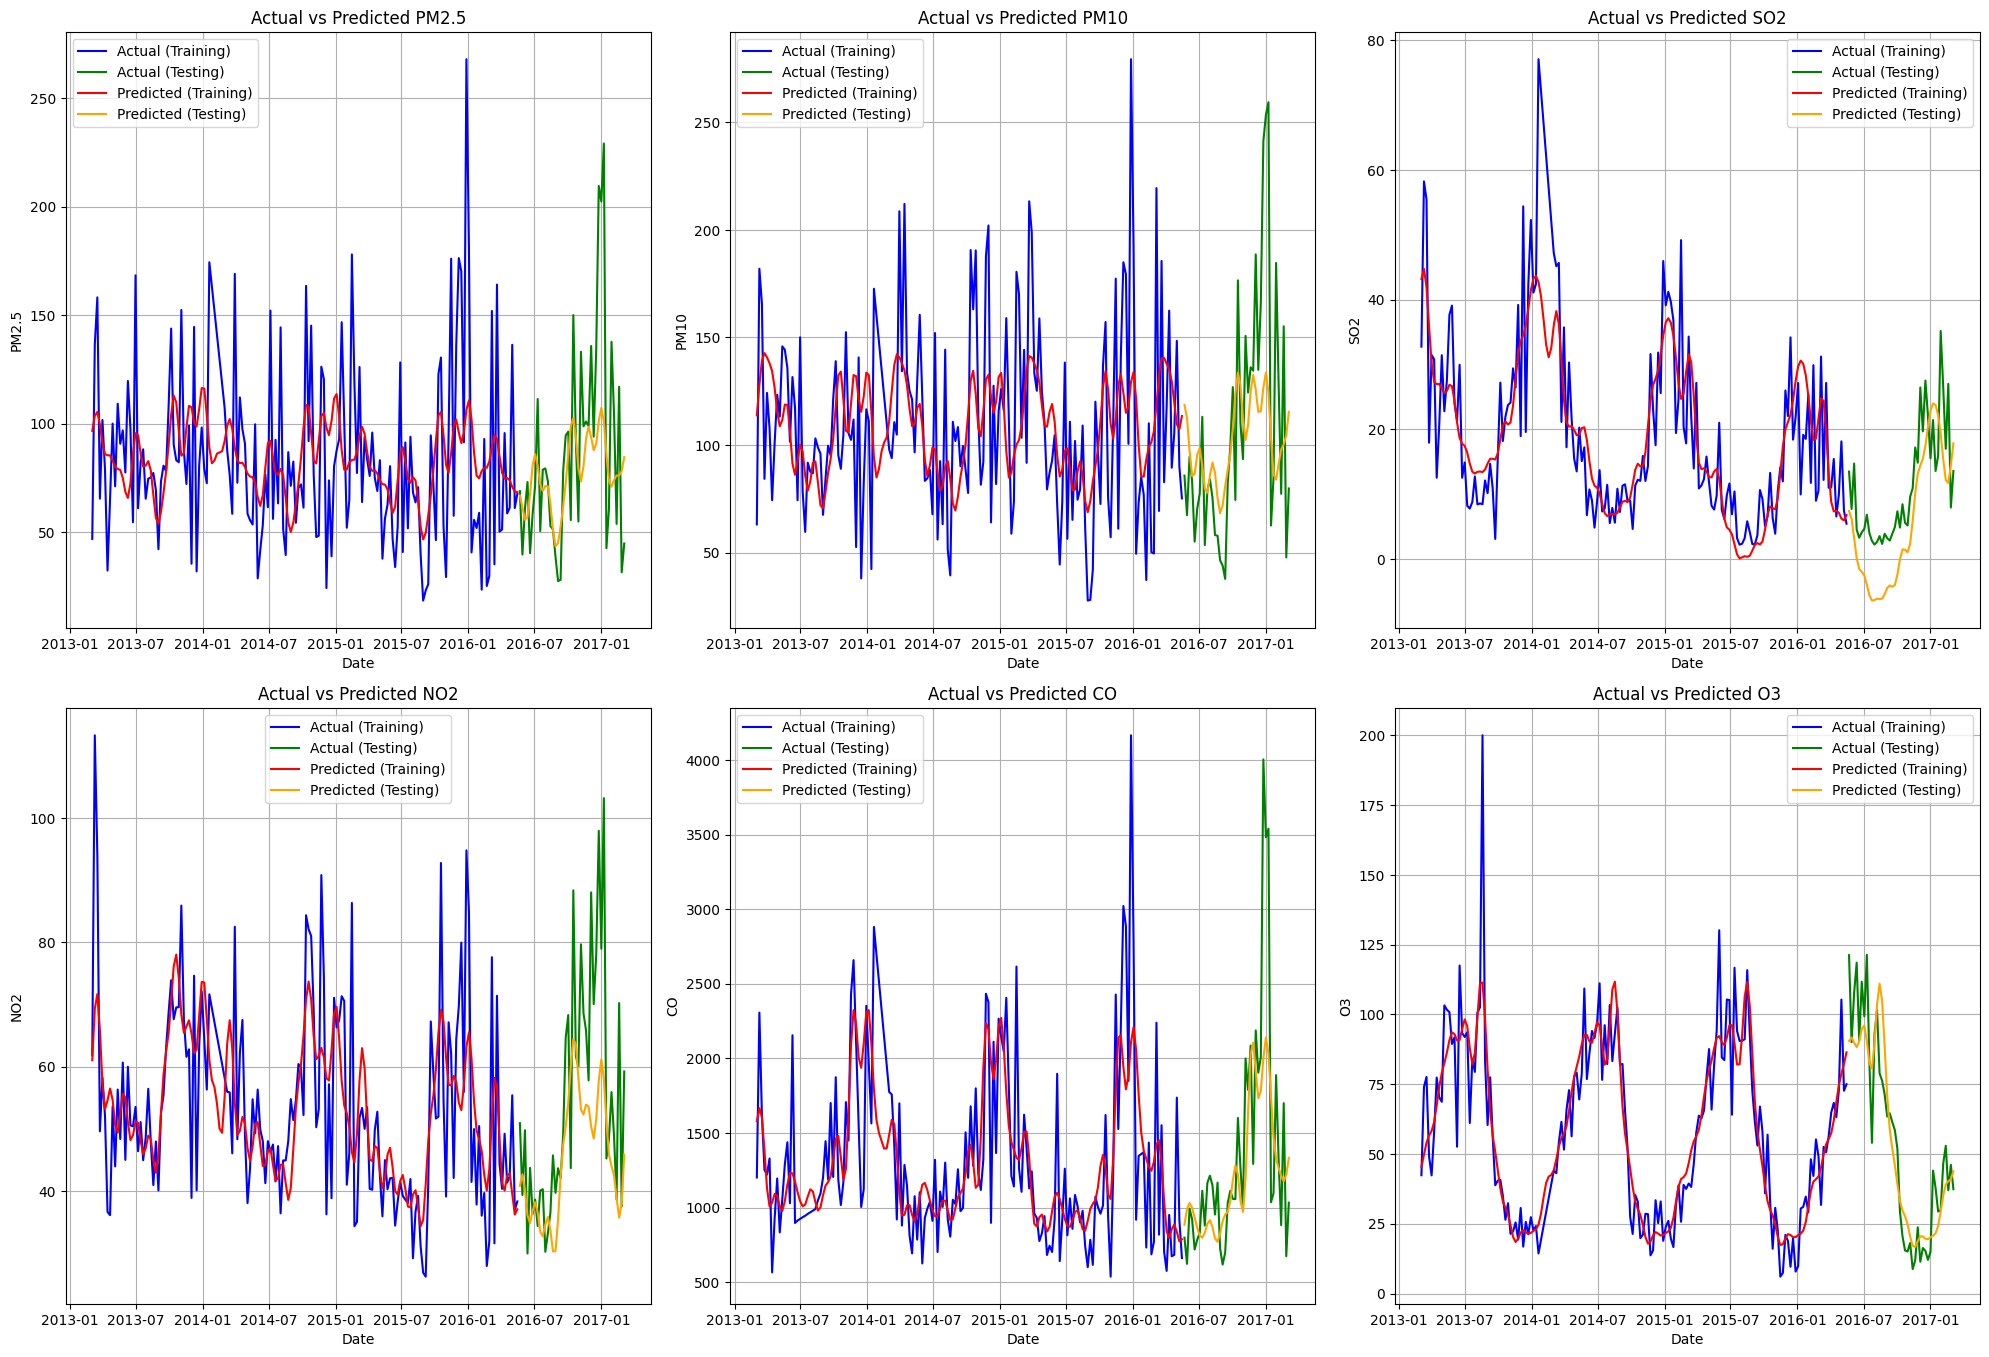

Training MAE:
PM2.5: 32.00402487307432
PM10: 36.06622832400072
SO2: 7.485705879945961
NO2: 10.335388889332421
CO: 369.46609906681107
O3: 15.263476148399604

Training MSE:
PM2.5: 1723.2123934953875
PM10: 2099.623453142583
SO2: 91.27927361792587
NO2: 199.14089672560672
CO: 273479.5710665212
O3: 447.1758218832979

Training RMSE:
PM2.5: 41.51159348297036
PM10: 45.82164830233176
SO2: 9.554018715594285
NO2: 14.111729048051012
CO: 522.9527426704265
O3: 21.14653214792671

Testing MAE:
PM2.5: 28.966209210410707
PM10: 34.556628419160816
SO2: 7.398069024439055
NO2: 11.808494090908201
CO: 360.37172853802116
O3: 10.958281564675575

Testing MSE:
PM2.5: 1634.1906088679566
PM10: 2205.0572294977287
SO2: 65.32150108825496
NO2: 271.5508865618459
CO: 296395.2919672879
O3: 207.03027579219392

Testing RMSE:
PM2.5: 40.425123486118835
PM10: 46.95803689995706
SO2: 8.082171805168148
NO2: 16.478801126351573
CO: 544.421979687896
O3: 14.388546687980476


In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming df_0 is your prepared DataFrame
# You might need to adjust this according to your specific DataFrame structure
variables = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']  # List of variables to predict

# Convert 'wd' column to numeric using label encoding
df['wd'] = LabelEncoder().fit_transform(df['wd'])

# Aggregate data at weekly level
df_weekly = df.resample('W', on='timestamp').mean().reset_index()  # Reset index to make 'timestamp' a column again

# Initialize dictionaries to store accuracy metrics
training_errors = {'MAE': {}, 'MSE': {}, 'RMSE': {}}
testing_errors = {'MAE': {}, 'MSE': {}, 'RMSE': {}}

# Split your data into training and testing sets
train_size = int(0.8 * len(df_weekly))  # 80% training data, 20% testing data
train_data = df_weekly[:train_size]
test_data = df_weekly[train_size:]

# Create subplots for each variable in a 3 by 3 grid
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3

    # Prepare data for the variable
    train_data_var = train_data[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})
    test_data_var = test_data[['timestamp', var]].rename(columns={'timestamp': 'ds', var: 'y'})

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the training data
    model.fit(train_data_var)

    # Make predictions on both training and testing data
    train_forecast = model.predict(train_data_var)
    test_forecast = model.predict(test_data_var)

    # Drop rows with NaN values
    train_data_var = train_data_var.dropna()
    train_forecast = train_forecast.dropna()

    # Truncate forecasted values to match the length of actual values
    train_forecast_truncated = train_forecast[:len(train_data_var)]

    # Calculate MAE, MSE, and RMSE for training data
    train_mae = mean_absolute_error(train_data_var['y'], train_forecast_truncated['yhat'])
    train_mse = mean_squared_error(train_data_var['y'], train_forecast_truncated['yhat'])
    train_rmse = np.sqrt(train_mse)


    # Calculate MAE, MSE, and RMSE for testing data
    test_mae = mean_absolute_error(test_data_var['y'], test_forecast['yhat'])
    test_mse = mean_squared_error(test_data_var['y'], test_forecast['yhat'])
    test_rmse = np.sqrt(test_mse)

    # Store errors in dictionaries
    training_errors['MAE'][var] = train_mae
    training_errors['MSE'][var] = train_mse
    training_errors['RMSE'][var] = train_rmse

    testing_errors['MAE'][var] = test_mae
    testing_errors['MSE'][var] = test_mse
    testing_errors['RMSE'][var] = test_rmse

    # Plot actual vs predicted values
    axs[row, col].plot(train_data_var['ds'], train_data_var['y'], label='Actual (Training)', color='blue')
    axs[row, col].plot(test_data_var['ds'], test_data_var['y'], label='Actual (Testing)', color='green')
    axs[row, col].plot(train_forecast['ds'], train_forecast['yhat'], label='Predicted (Training)', color='red')
    axs[row, col].plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted (Testing)', color='orange')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel(var)
    axs[row, col].set_title(f'Actual vs Predicted {var}')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Remove unused subplots
for i in range(len(variables), len(axs.flat)):
    fig.delaxes(axs.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Print training and testing errors for all variables
print("Training MAE:")
for var, mae in training_errors['MAE'].items():
    print(f"{var}: {mae}")

print("\nTraining MSE:")
for var, mse in training_errors['MSE'].items():
    print(f"{var}: {mse}")

print("\nTraining RMSE:")
for var, rmse in training_errors['RMSE'].items():
    print(f"{var}: {rmse}")

print("\nTesting MAE:")
for var, mae in testing_errors['MAE'].items():
    print(f"{var}: {mae}")

print("\nTesting MSE:")
for var, mse in testing_errors['MSE'].items():
    print(f"{var}: {mse}")

print("\nTesting RMSE:")
for var, rmse in testing_errors['RMSE'].items():
    print(f"{var}: {rmse}")


In [ ]:
print("Train Data 'y' with NaN:", train_data_var[train_data_var['y'].isna()])
print("Train Forecast 'yhat' with NaN:", train_forecast[train_forecast['yhat'].isna()])


Train Data 'y' with NaN: Empty DataFrame
Columns: [ds, y]
Index: []
Train Forecast 'yhat' with NaN: Empty DataFrame
Columns: [ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat]
Index: []


In [ ]:
from tabulate import tabulate

# Collect errors in a list of lists for tabulate
data = []
for var in variables:
    data.append([var,
                 training_errors['MAE'][var],
                 training_errors['MSE'][var],
                 training_errors['RMSE'][var],
                 testing_errors['MAE'][var],
                 testing_errors['MSE'][var],
                 testing_errors['RMSE'][var]])

# Print as table
headers = ["Variable", "Training MAE", "Training MSE", "Training RMSE", "Testing MAE", "Testing MSE", "Testing RMSE"]
print(tabulate(data, headers=headers, tablefmt="grid"))


+------------+----------------+----------------+-----------------+---------------+---------------+----------------+
| Variable   |   Training MAE |   Training MSE |   Training RMSE |   Testing MAE |   Testing MSE |   Testing RMSE |
+============+================+================+=================+===============+===============+================+
| PM2.5      |       32.004   |      1723.21   |        41.5116  |      28.9662  |     1634.19   |       40.4251  |
+------------+----------------+----------------+-----------------+---------------+---------------+----------------+
| PM10       |       36.0662  |      2099.62   |        45.8216  |      34.5566  |     2205.06   |       46.958   |
+------------+----------------+----------------+-----------------+---------------+---------------+----------------+
| SO2        |        7.48571 |        91.2793 |         9.55402 |       7.39807 |       65.3215 |        8.08217 |
+------------+----------------+----------------+-----------------+------